<a href="https://colab.research.google.com/github/kghilothia06/customer_analysis/blob/master/Data_preprocessing_CAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing python libraries

In [1]:
import numpy as np #for numerical computations
import pandas as pd #for reading the dataset
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for interactive visualizations

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing the dataset
df = pd.read_excel('Customers2_TimeSeries.xlsx')

# Exploring the dataset

In [3]:
df.info

<bound method DataFrame.info of       CustomerID       Date         Interaction MadeAPurchase
0              1 2020-01-05           call_made            No
1              1 2020-01-06       call_received            No
2              1 2020-01-07          email_sent            No
3              1 2020-01-08        email_opened            No
4              1 2020-01-09        email_opened            No
...          ...        ...                 ...           ...
6019         753 2020-01-31       call_received           Yes
6020         753 2020-02-01          email_sent           Yes
6021         753 2020-02-02        email_opened           Yes
6022         753 2020-02-03        email_opened           Yes
6023         753 2020-02-04  webinar_registered           Yes

[6024 rows x 4 columns]>

In [4]:
#first 5 entries
df.head(10)

,CustomerID,Date,Interaction,MadeAPurchase
0,1,2020-01-05,call_made,No
1,1,2020-01-06,call_received,No
2,1,2020-01-07,email_sent,No
3,1,2020-01-08,email_opened,No
4,1,2020-01-09,email_opened,No
5,1,2020-01-10,webinar_registered,No
6,1,2020-01-11,webinar_attended,No
7,1,2020-01-12,paper_downloaded,No
8,2,2020-01-13,call_received,No
9,2,2020-01-14,call_received,No


In [5]:
df.shape

(6024, 4)

In [6]:
df.describe

<bound method NDFrame.describe of       CustomerID       Date         Interaction MadeAPurchase
0              1 2020-01-05           call_made            No
1              1 2020-01-06       call_received            No
2              1 2020-01-07          email_sent            No
3              1 2020-01-08        email_opened            No
4              1 2020-01-09        email_opened            No
...          ...        ...                 ...           ...
6019         753 2020-01-31       call_received           Yes
6020         753 2020-02-01          email_sent           Yes
6021         753 2020-02-02        email_opened           Yes
6022         753 2020-02-03        email_opened           Yes
6023         753 2020-02-04  webinar_registered           Yes

[6024 rows x 4 columns]>

In [7]:
#checking for missing/null values
df.isnull().sum()

CustomerID       0
Date             0
Interaction      0
MadeAPurchase    0
dtype: int64

In [8]:
#counting no. of different interactions possible from the dataset
df.Interaction.value_counts()

email_opened          1447
call_received         1348
call_made              776
email_sent             661
paper_downloaded       658
webinar_registered     587
webinar_attended       547
Name: Interaction, dtype: int64

In [9]:
#counting no. of different dates in the dataset
df['Date'].value_counts()

2020-02-19    198
2020-02-15    198
2020-02-21    198
2020-02-20    198
2020-02-18    198
             ... 
2020-02-11     52
2020-02-09     52
2020-02-10     52
2020-02-12     52
2020-02-14     52
Name: Date, Length: 65, dtype: int64

# Data Preprocessing & Visualization

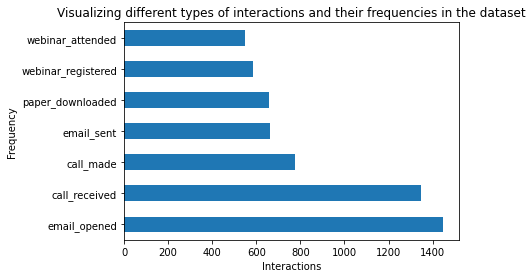

In [10]:
#plotting a bar graph of 'Interaction' column
df['Interaction'].value_counts().plot(kind='barh')
plt.xlabel('Interactions')
plt.ylabel('Frequency')
plt.title('Visualizing different types of interactions and their frequencies in the dataset')
plt.show()

In [0]:
#We label encode 'MadeAPurchase' column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MadeAPurchase'] = le.fit_transform(df['MadeAPurchase'])


In [0]:
#We now label encode 'Interaction' column
df['Interaction'] = le.fit_transform(df['Interaction'])

Now, we partition the data as follows:
We follow sliding window technique with each window denoting activities of one customer over a period of 8 days

In [0]:
# segments is a list where each row contains activities of a single customer
# labels is a list containing whether a purchase is made or not for each customer
N_time_steps = 8
step = 8
segments = []
labels = []
for i in range(0,len(df)-1,step):
  xs = df['Interaction'].values[i : i+N_time_steps]
  ys = df['MadeAPurchase'].values[i]
  segments.append([xs])
  labels.append([ys])

In [42]:
np.array(segments).shape

(753, 1, 8)

In [43]:
segments

[[array([0, 1, 3, 2, 2, 6, 5, 4])],
 [array([1, 1, 3, 2, 2, 6, 5, 4])],
 [array([1, 1, 3, 2, 2, 6, 5, 4])],
 [array([0, 1, 0, 1, 0, 1, 1, 3])],
 [array([2, 2, 6, 5, 4, 2, 1, 2])],
 [array([3, 2, 3, 4, 6, 2, 0, 5])],
 [array([4, 2, 6, 0, 0, 1, 3, 2])],
 [array([2, 6, 5, 4, 1, 1, 3, 2])],
 [array([2, 6, 5, 4, 1, 1, 3, 2])],
 [array([2, 6, 5, 4, 0, 1, 0, 1])],
 [array([0, 1, 1, 3, 2, 2, 6, 5])],
 [array([4, 2, 1, 2, 3, 2, 3, 4])],
 [array([6, 2, 0, 5, 0, 1, 3, 2])],
 [array([2, 1, 2, 3, 2, 3, 4, 6])],
 [array([2, 0, 5, 0, 1, 3, 2, 2])],
 [array([1, 2, 3, 2, 3, 4, 6, 2])],
 [array([0, 5, 0, 1, 3, 2, 2, 1])],
 [array([2, 3, 2, 3, 4, 6, 2, 0])],
 [array([5, 0, 2, 2, 2, 6, 5, 4])],
 [array([1, 1, 3, 2, 2, 6, 5, 4])],
 [array([1, 1, 3, 2, 2, 6, 5, 4])],
 [array([0, 1, 0, 1, 0, 1, 1, 3])],
 [array([2, 2, 6, 5, 4, 2, 1, 2])],
 [array([3, 2, 3, 4, 6, 2, 0, 5])],
 [array([4, 2, 6, 0, 0, 1, 3, 2])],
 [array([2, 6, 5, 4, 1, 1, 3, 2])],
 [array([2, 6, 5, 4, 1, 1, 3, 2])],
 [array([2, 6, 5, 4, 0, 1, 0

##Model Building

train-test split

out of 753 customers , we keep data of around 600 customers as training data and rest as test data


In [0]:
#columns of our interest our : 'Date' and 'MadeAPurchase'
X = df.iloc[:,1].values
y = df.iloc[:,3].values

In [39]:
X.shape[0]

6024

In [0]:
from sklearn.model_selection import train_test_split
X_train , X_val , y_train , y_val = train_test_split(X , y , test_size=0.2 , random_state=0)

In [32]:
X_val.shape

(1205,)

In [40]:
X_train.shape

(4819,)

Lets start building the LSTM network first

In [35]:
import tensorflow.keras
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(LSTM(64,input_shape=(X.shape[0],1)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy'] )

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [44]:
epochs_hist = model.fit(X , y , epochs=5, batch_size=50 , validation_split=0.2)


ValueError: ignored

In [0]:
from google.colab import drive
drive.mount('/content/drive')